In [58]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import keras as tf
from keras.utils import np_utils
from sklearn.model_selection import train_test_split


In [59]:
b = np.load('mnist.npz')

In [61]:
X_test  = b['x_test']
X_train  = b['x_train']
y_train = b['y_train']
y_test = b['y_test']

In [62]:
pixel_numbers  = X_train.shape[1]*X_train.shape[1]
print(pixel_numbers)
X_train = X_train.reshape(X_train.shape[0],pixel_numbers).astype('float32')
X_test = X_test.reshape(X_test.shape[0],pixel_numbers).astype('float32')

784


In [63]:
X_train = X_train/255
X_test = X_test/255
y_train= np_utils.to_categorical(y_train)
y_test= np_utils.to_categorical(y_test)
num_classes=y_train.shape[1]
print(num_classes)

10


In [64]:
from keras.engine.sequential import input_layer
model  = Sequential()
model.add(Dense(pixel_numbers, input_dim=pixel_numbers,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [65]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=200,verbose=2)

Epoch 1/10
300/300 - 4s - loss: 0.2790 - accuracy: 0.9200 - val_loss: 0.1399 - val_accuracy: 0.9601 - 4s/epoch - 13ms/step
Epoch 2/10
300/300 - 3s - loss: 0.1101 - accuracy: 0.9691 - val_loss: 0.0949 - val_accuracy: 0.9711 - 3s/epoch - 9ms/step
Epoch 3/10
300/300 - 3s - loss: 0.0712 - accuracy: 0.9794 - val_loss: 0.0756 - val_accuracy: 0.9759 - 3s/epoch - 10ms/step
Epoch 4/10
300/300 - 3s - loss: 0.0502 - accuracy: 0.9855 - val_loss: 0.0677 - val_accuracy: 0.9791 - 3s/epoch - 9ms/step
Epoch 5/10
300/300 - 4s - loss: 0.0375 - accuracy: 0.9894 - val_loss: 0.0594 - val_accuracy: 0.9815 - 4s/epoch - 12ms/step
Epoch 6/10
300/300 - 3s - loss: 0.0262 - accuracy: 0.9929 - val_loss: 0.0635 - val_accuracy: 0.9807 - 3s/epoch - 9ms/step
Epoch 7/10
300/300 - 3s - loss: 0.0195 - accuracy: 0.9952 - val_loss: 0.0670 - val_accuracy: 0.9781 - 3s/epoch - 10ms/step
Epoch 8/10
300/300 - 3s - loss: 0.0154 - accuracy: 0.9964 - val_loss: 0.0610 - val_accuracy: 0.9817 - 3s/epoch - 10ms/step
Epoch 9/10
300/300 

In [66]:
score= model.evaluate(X_test, y_test, verbose=0)
print('The error is: %.2f%%'%(100-score[1]*100))

The error is: 1.75%


1/1 [==============================] - 0s 33ms/step
Predicted digit: [[1.6096725e-11 1.6719755e-19 1.1981928e-07 7.0616361e-06 2.5140120e-36
  9.9965703e-01 5.5781242e-09 3.3578090e-04 2.6258407e-11 2.4805172e-14]]


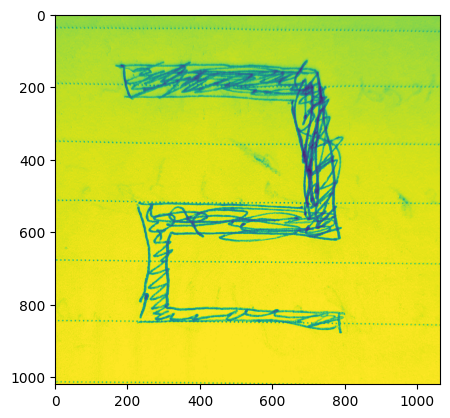

In [69]:
from PIL import Image
input_image = Image.open('dd.jpg').convert('L')
plt.plot()
plt.imshow(input_image)
input_image = input_image.resize((28, 28))
input_image = np.array(input_image) 
input_image = input_image.reshape(1, 784)
input_image = input_image.astype('float32') / 255
predictions = model.predict(input_image)
# predicted_digit = np.argmax(predictions)
print("Predicted digit:", predictions)